# Hate Speech Detection using LSTM

In [48]:
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.shape

(24783, 7)

### Deleting unwanted columns

In [4]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [5]:
df.drop(columns = ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],inplace=True)

In [6]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### Checking null values

In [7]:
df.isna().sum()

class    0
tweet    0
dtype: int64

In [8]:
df.tweet.iloc[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [9]:
df.tweet.iloc[100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

### Deleting unwanted symbols and numerical data

In [10]:
df['processed_tweet'] = df.tweet.str.replace(r'[^a-zA-Z]',' ',regex=True)
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [13]:
df.processed_tweet.iloc[1000]

'                                                                 betysweetcocker  That pussy is just              imma assume she just had a baby like  the day before '

### Removing unwanted spaces

In [14]:
df['processed_tweet_2'] = df['processed_tweet'].str.replace(r'[\s]+',' ',regex=True)

In [15]:
df.processed_tweet_2.iloc[1000]

' betysweetcocker That pussy is just imma assume she just had a baby like the day before '

### Deleting unwanted column


In [16]:
df.drop(columns = ['tweet','processed_tweet'],inplace=True)

In [17]:
df.head()

,class,processed_tweet_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


# NLP techniques

In [20]:
nlp = spacy.load('en_core_web_sm')

### Lemmatization

In [21]:
def lemmatization(text):
    doc = nlp(text)
    lemmaList = [word.lemma_ for word in doc]
    return ' '.join(lemmaList)

In [22]:
df['lemma_tweet'] = df['processed_tweet_2'].apply(lemmatization)

In [28]:
df.processed_tweet_2.iloc[67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [29]:
df.lemma_tweet.iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

### Removing stopwords

In [30]:
def remove_stopwords(text):
    doc = nlp(text)
    no_stopwords_list = [word.text for word in doc if not word.is_stop]
    return ' '.join(no_stopwords_list)

In [31]:
df['final_tweet'] = df.lemma_tweet.apply(remove_stopwords)

In [32]:
df.lemma_tweet.iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [34]:
df.final_tweet.iloc[67]

'   Allyhaaaaa Lemmie eat Oreo amp dish oreo lol'

# One Hot representation

In [36]:
vocab_size = 10000
one_hot_representation = [one_hot(words,vocab_size) for words in df['final_tweet']]

In [39]:
for i in range(0,4):
    print(df['final_tweet'].iloc[i])

   RT mayasolovely woman shouldn t complain clean house amp man trash
   RT mleew boy dat cold tyga dwn bad cuffin dat hoe st place
   RT UrKindOfBrand Dawg RT sbaby life fuck bitch start cry confuse shit
   RT C G Anderson viva base look like tranny


In [40]:
for i in range(0,4):
    print(one_hot_representation[i])

[389, 4510, 7392, 195, 590, 6737, 6439, 6516, 4396, 4279, 543]
[389, 9744, 2952, 686, 6692, 8090, 7272, 8401, 460, 686, 1899, 3753, 4118]
[389, 6782, 1387, 389, 7483, 6977, 7314, 5678, 7115, 4209, 8027, 4999]
[389, 3077, 2370, 790, 2848, 9683, 5345, 5992, 131]


In [42]:
sentence_length = 20
embedded_tweet = pad_sequences(one_hot_representation, padding = 'pre',maxlen=sentence_length)

In [44]:
for i in range(0,4):
    print(embedded_tweet[i])

[   0    0    0    0    0    0    0    0    0  389 4510 7392  195  590
 6737 6439 6516 4396 4279  543]
[   0    0    0    0    0    0    0  389 9744 2952  686 6692 8090 7272
 8401  460  686 1899 3753 4118]
[   0    0    0    0    0    0    0    0  389 6782 1387  389 7483 6977
 7314 5678 7115 4209 8027 4999]
[   0    0    0    0    0    0    0    0    0    0    0  389 3077 2370
  790 2848 9683 5345 5992  131]


In [46]:
X = np.array(embedded_tweet)
y = np.array(df['class'])

In [47]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

### Balance Dataset

In [49]:
smote = SMOTE(sampling_strategy='minority')
X,y = smote.fit_resample(X, y)

### Train test split

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((34034, 20), (8509, 20), (34034,), (8509,))

# Building LSTM Model

In [54]:
import tensorflow as tf
from tensorflow import keras

dimension = 50
model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size,dimension,input_shape=(sentence_length,)),
    #LSTM Layer stacked
    keras.layers.LSTM(100,return_sequences=True),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.LSTM(50),
    #output layer
    keras.layers.Dense(3,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\insec\PycharmProjects\HateSpeechDetection\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 50)         │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 20, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 20, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,953 (2.33 MB)

 Trainable params: 610,953 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.fit(X_train,y_train,epochs = 10,batch_size = 32)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8700 - loss: 0.3428
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9446 - loss: 0.1664
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9612 - loss: 0.1222
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9709 - loss: 0.0935
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9771 - loss: 0.0739
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9825 - loss: 0.0552
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9872 - loss: 0.0394
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9904 - loss: 0.0306
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9934 - loss: 0.0214
Epoch 10/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9946 - loss: 0.0164


In [57]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f'Model Accuracy: {accuracy*100}')

266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8886 - loss: 0.6684
Model Accuracy: 88.8588547706604


In [58]:
pred = np.argmax(model.predict(X_test),axis=-1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [59]:
y_test[:5]

array([1, 1, 0, 1, 2])

In [60]:
pred[:5]

array([1, 1, 0, 1, 2])

# Some Evaluation

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3812
           1       0.90      0.91      0.91      3807
           2       0.77      0.68      0.72       890

    accuracy                           0.89      8509
   macro avg       0.86      0.84      0.84      8509
weighted avg       0.89      0.89      0.89      8509



Text(50.722222222222214, 0.5, 'Actual')

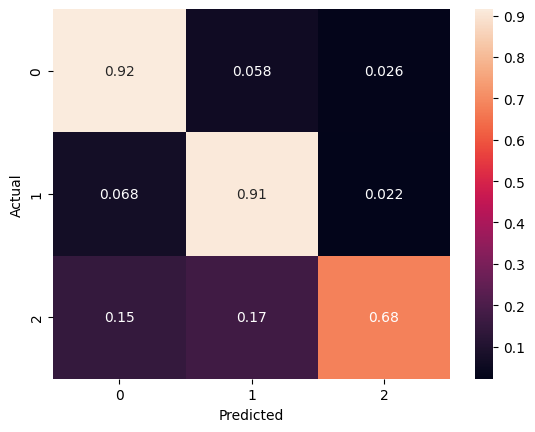

In [64]:
cf = confusion_matrix(y_test,pred,normalize = 'true')
sns.heatmap(cf,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')